# Causal Inference
# School of Information, University of Michigan 
## Week 4

### Resources:

 - Course Manual, which can be found in Coursera
 - The research paper that inspired the question: [Kerr and Lerner, Review of Financial Studies 2014](assets/KerrLerner2014.pdf)

## Part 1


### Background
A central question in entrepreneurial finance investigates to what extent early-stage financiers have a real impact on the firms they support (financially and otherwise). We would like to answer this question with our data that comes from one of the biggest SaaS (software as a service) investor angel groups.

The angel group is composed of 39 angel investors and each angel investor has a very hands-on role in picking ventures the group will support. After an initial screening by the staff, the entrepreneurs are then invited to give a short presentation to the angel members. Through a voting process, angel investors decide which ventures will be provided the group's support and which will not. Entrepreneurs that get votes of 20 or more angel investors are provided with investment and advice.

It should be noted that, due to strict application requirements of the angel group, characteristics of the ventures (including access to other financing opportunities) were balanced across the two sides of the voting cutoff.

### Data
For this question we will use the dataset “lecture4_RD.csv” that contains data from many SaaS (software as a service) ventures that have applied to one of the biggest angel investor groups.
 
 - *dau_mau*: daily active user/monthly active user ratio measured 15 months after the angel group voting (you can think of it as the percent of users that regularly engage with the product)
 - *revenue_g*: revenue growth rate measured 15 months after the angel group voting
 - *votes*: number of angel investor votes

In [1]:
#Import statements. Run this cell. 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
#Uploading data for Part 1. Run this cell.
data_rd = pd.read_csv('assets/lecture4_RD.csv')

#Uncomment below and run the cell to see the first five lines of the dataframe.
data_rd.head()

,vote,dau_mau,revenue_g
0,32,0.824858,1.371313
1,0,0.030839,0.488632
2,15,0.199545,0.718289
3,28,0.652112,1.371974
4,24,0.602617,1.107473


### Questions

The voting procedure that determines which entrepreneur gets the support of the angel group provides us with the opportunity to utilize a sharp regression discontinuity design. We are interested in two measures of success: 1) daily active user to monthly active user ratio (*dau_mau*) and 2) revenue growth rate (*revenue_g*).

**Note**: You can refer to the manual for the methods we use in the assignment if you need to. 

**Use the data_rd dataframe uploaded above to answer the questions in Part 1, unless otherwise specified.**

**1.** Use the matplotlib library to plot the data for *dau_mau* against the running variable *vote* on a scatter plot, such that y-axis shows *dau_mau* and x-axis shows *vote*. (1 pt)

**Note**: This question will be manually graded

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


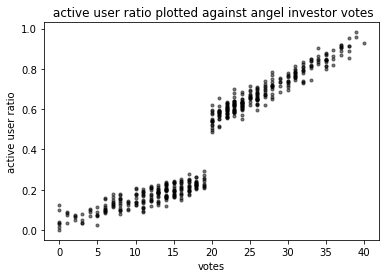

In [3]:
# YOUR CODE HERE



colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(data_rd['vote'], data_rd['dau_mau'], s=area, c=colors, alpha=0.5)
plt.title(' active user ratio plotted against angel investor votes')
plt.xlabel('votes')
plt.ylabel('active user ratio')
plt.show()

**2.** The visual shows that the relationship between *vote* and *dau_mau* is linear, yet the slope seems to differ across two sides of the cutoff. 

**2a.** Create a binary variable that takes a value of 1 if the number of votes is greater than or equal to 20, call it `D`, and add it to the data_rd dataframe. Create a running variable re-centered at the cutoff 20 (e.g. if the value of the old variable is 20, then the value of the new variable should be 0). Name it `vote_c` and add it to the data_rd dataframe. (1 pt)

**Tip**: Use `np.where()` to create the binary variable.

In [4]:
# YOUR CODE HERE
data_rd['D'] = np.where(data_rd['vote']>=20, 1, 0)

data_rd['vote_c'] = data_rd['vote'] - 20



In [5]:
# Hidden Tests, checking the values of columns D and vote_c.

**2b.** Using robust standard errors, regress *dau_mau* on *vote_c*, *D*, and the interaction of *vote_c* with *D* (i.e. *vote_c*:*D*) to account for the different slopes. Assign the coefficient in front of *D* to the variable ``d_coeff1_2_2`` and ensure that its data type is float. This is the impact of angel group’s support on the DAU/MAU ratio. (Round to four decimal places.) (1 pt)

In [6]:
# YOUR CODE HERE
reg = smf.ols(formula = 'dau_mau ~ vote_c + D + vote_c:D', data = data_rd).fit() 
robust_reg = reg.get_robustcov_results(cov_type= 'HC1')
#print(robust_reg.summary())

d_coeff1_2_2 = 0.3016 

In [7]:
# Hidden Tests, checking the value of d_coeff1_2_2.

**3.** Use the matplotlib library to plot the data for *revenue_g* against the re-centered running variable *vote_c* on a scatterplot, such that the y-axis shows *revenue_g* and the x-axis shows *vote_c*. (1 pt)

**Note**: This question will be manually graded.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


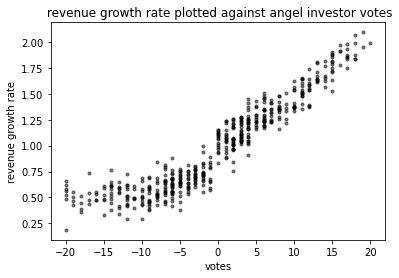

In [8]:
# YOUR CODE HERE
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(data_rd['vote_c'], data_rd['revenue_g'], s=area, c=colors, alpha=0.5)
plt.title(' revenue growth rate plotted against angel investor votes')
plt.xlabel('votes')
plt.ylabel('revenue growth rate')
plt.show()



 **4.** The visual shows that the relationship between *vote_c* and *revenue_g* is nonlinear. 
 
**4a.** Create a new column in the data_rd dataframe called `vote_c_sq` that is equal to *vote_c*$^{2}$. (1 pt)

In [9]:
# YOUR CODE HERE
data_rd['vote_c_sq'] = data_rd['vote_c']**2

In [10]:
# Hidden Tests, checking the values of vote_c_sq.

**4b.** Using robust standard errors, regress *revenue_g* on *vote_c*, *vote_c_sq*, and *D*. Assign the coefficient in front of variable *D* to the variable `d_coeff1_4_2` and ensure that its data type is float. This is the impact of angel group’s support on revenue growth. (Round to four decimal places.) (1 pt)

In [11]:
# YOUR CODE HERE
reg = smf.ols(formula = 'revenue_g ~ vote_c + vote_c_sq +  D', data = data_rd).fit() 
robust_reg = reg.get_robustcov_results(cov_type= 'HC1')
# print(robust_reg.summary())

d_coeff1_4_2 = 0.2474

In [12]:
# Hidden tests, checking the value of d_coeff1_4_2.

**5.** Remember that another way to deal with nonlinearities is to restrict our estimation to observations close to the threshold.

**5a.** Using robust standard errors, regress *revenue_g* on *vote_c* and *D* with a bandwidth equal to 3 votes (i.e. use only observations with votes greater than or equal to 17 and less than or equal to 23). Assign the coefficient in front of variable *D* to the variable ``d_coeff1_5_1``. This is the impact of angel group’s support on revenue growth. (Round to four decimal places.) (1 pt)

In [13]:
# YOUR CODE HERE


data_rd_bandwidth = data_rd
data_rd_bandwidth['Flag'] = data_rd_bandwidth['vote'].between(17, 23, inclusive=True)
data_rd_bandwidth = data_rd_bandwidth.loc[data_rd_bandwidth['Flag'] == True]
data_rd_bandwidth

reg = smf.ols(formula = 'revenue_g ~ vote_c +  D', data = data_rd_bandwidth).fit() 
robust_reg = reg.get_robustcov_results(cov_type= 'HC1')
print(robust_reg.summary())

d_coeff1_5_1 = 0.2488 

                            OLS Regression Results                            
Dep. Variable:              revenue_g   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     213.7
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           3.23e-41
Time:                        04:11:34   Log-Likelihood:                 113.98
No. Observations:                 129   AIC:                            -222.0
Df Residuals:                     126   BIC:                            -213.4
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7870      0.025     31.852      0.0

In [14]:
# Hidden Tests, checking the value of d_coeff1_5_1.

**5b.** How does the size of the coefficient (round to four decimal places) in front of D compare between the nonlinear model (Part 1, Question 4b.) and the model with reduced bandwidth (Part 1, Question 5a.)? Explain why estimate precision (standard error) differs between the two models. (2 pts)  

**Note**: This question will be manually graded.

The cofficient in front of D for the nonlinear model is about 0.2474, while the coefficient in front of D for the reduced bandwidth model is marginally larger, at about 0.2488. In regards to the standard error, the SE for the nonlinear model is about  0.017, while the SE for the reduced bandwidth model is about 0.039. This is likely on account of the fact that, while decreasing the bandwidth has the benefit of protecting the viewer from potentially misleading trends by zeroing in on values closer to the cutoff, as well as decreasing the bias, it also results in higher variance as a natural consequence of reducing the number of observations(and thus, increases the standard error). Increasing the bandwidth, conversely, will result in higher bias due to more datapoints farther from the cutoff, but will have a lower variance(standard error) for the same reason(more datapoints).

## Part 2

### Background

The Surgeon General of the US estimates that smoking during pregnancy doubles the chance a baby will be born with a low birth weight (<2500 grams). Over the past 20 years, roughly 17 percent of births are to women who smoked during this period. In recent years, many public health officials have suggested that higher cigarette taxes can be used to decrease the rate of smoking during pregnancy and consequently improve birth outcomes. On May 1 in 1994, the state of Michigan raised the cigarette tax from 25 to 75 cents per pack.


### Data

The data set “lecture4_DD.csv" has 101,676 observations. There are only three variables in the data set and variable definitions are listed below.

- *state*: 2-digit state FIPS code. Michigan is state 26, Iowa is 19.
- *smoked*: dummy variable; equal to 1 if a mother self-reported that she smoked during her pregnancy, otherwise it is equal to 0.
- *year*: observations that come from the time period
    - starting with May 1, 1992 up to April 30, 1993 is labeled as year 1
    - starting with May 1, 1993 up to April 30, 1994 is labeled as year 2
    - starting with May 1, 1994 up to April 30, 1995 is labeled as year 3 

In [15]:
# Uploading data for part 2. Run this cell
data_dd = pd.read_csv('assets/lecture4_DD.csv') 

# Uncomment below to view the first five lines of the csv file for part 2
data_dd.head(5)

,state,smoked,year
0,19,0,1
1,19,0,1
2,19,0,1
3,19,0,1
4,19,0,1


### Questions

We will use the data from the Michigan “experiment” to evaluate whether higher taxes reduce smoking among pregnant women. We will be using the differences-in-differences technique, where the state of Michigan is the treatment group and another Midwestern state, Iowa, is going to constitute our control group.

**Note**: You can refer to the manual for the commands we use in the assignment if you need to. 

**Use the data_dd dataframe uploaded above to answer the questions below unless otherwise specified.**

**1.** Let’s start by visually inspecting our data for parallel trends.

**1a.** Using a scatterplot, plot pre-treatment smoking rates for Michigan and Iowa, such that the y-axis shows the rate of smoking for the pre-treatment years (years 1 and 2) that are marked on the x-axis. Use different colors for each state. Connect the smoking rate of year 1 and 2 for each state. Scale your y-axis (smoking rate) to range between 0 and 0.4 with labels for 0.2 increments. Have your x-axis (year) range from 1 to 3 with labels for each year. (2 pts)

[Notice that, within a given category, taking the means of dummy variables allows us to calculate the rate. For example, if there are 3 smokers out of 5 pregnant women, and if we have an indicator/dummy variable that takes the value of 1 for smokers and 0 for non-smoker → mean of that dummy variable = (2x0 + 3x1)/5 = ⅗ = smoker to non-smoker pregnant women ratio]

**Note**: This question will be manually graded.

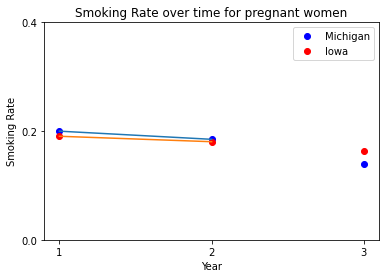

In [16]:
# YOUR CODE HERE

data_dd_groupby = data_dd
data_dd_groupby = data_dd_groupby.groupby(['state', 'year']).agg('mean')

data_dd_groupby = data_dd_groupby.reset_index()

x_Michigan = data_dd_groupby[data_dd_groupby['state']==26]['year']
y_Michigan = data_dd_groupby[data_dd_groupby['state']==26]['smoked']

x_Iowa = data_dd_groupby[data_dd_groupby['state']==19]['year']
y_Iowa = data_dd_groupby[data_dd_groupby['state']==19]['smoked']




plt.plot(x_Michigan, y_Michigan, 'o', color='blue', label='Michigan')
plt.plot(x_Iowa, y_Iowa, 'o', color='red', label='Iowa')



plt.plot(x_Michigan[0:2], y_Michigan[0:2])
plt.plot(x_Iowa[0:2], y_Iowa[0:2])

plt.xticks([1,2,3])
plt.yticks([0.0, 0.2, 0.4])

plt.xlabel('Year')
plt.ylabel('Smoking Rate')
plt.title('Smoking Rate over time for pregnant women')

plt.legend()

plt.show()

**1b.**	Based on the graph, do you think that differences-in-differences is a reasonable approach to estimate the causal effect in this setting? (Hint: parallel trends assumption.) (1 pt)

**Note**: This question will be manually graded.

The parallel trends assumption essentially implies that there is nothing unique to either the treatment or the control group that changed over time. In the case of the smoking rate example above, that would imply that Michigan would have had its smoking rate decline at the same rate as Iowa had the tax not been implemented(after the year 2 cutoff). In other words, there are no time variant, state specific confounders in this experiment. We can see, prior to the cutoff, both the lines for Michigan and Iowa are similarly negatively sloped. In other words, the pre-treatment trends for both states are practically identical. Therefore, a differences-in differences approach is a reasonable approach for this particular problem.

**2.** We will continue by creating a table [(treatment group, control group) x (pre-treatment, post-treatment)] to calculate the differences-in-differences estimate.

**2a.** Add two columns to the data_dd dataframe, a binary variable called ``treat`` (equals 1 for the data coming from the state of Michigan), and another called ``post`` (equals 1 for data coming from after the tax hike, i.e. year = 3). (1 pt)

In [17]:
# YOUR CODE HERE
data_dd['treat'] = np.where(data_dd['state']==26, 1, 0)
data_dd['post'] = np.where(data_dd['year']==3, 1, 0)


In [18]:
# Hidden Tests, checking the values of treat and post.

**2b.** Now calculate the corresponding means of the variable *smoked*. Assign cell entries to the corresponding variables `cell_i`, `cell_ii`, `cell_iii`.... Ensure that the data type of each variable is float. (Round the values to four decimal places.) (1 pt)

![Differences-in-differences Table](assets/Table2_2b.png)

In [30]:
# YOUR CODE HERE
grouped_df = data_dd.groupby(['post', 'treat']).agg('mean')

grouped_df = grouped_df.reset_index()




cell_i = 0.192290
cell_i = round(cell_i, 4)

cell_ii = 0.139564
cell_ii = round(cell_ii, 4)

cell_iv = 0.185586
cell_iv = round(cell_iv, 4)

cell_v = 0.163883
cell_v = round(cell_v, 4)

cell_iii = cell_ii - cell_i
cell_iii = round(cell_iii, 4)


cell_vi = cell_v - cell_iv
cell_vi = round(cell_vi, 4)

cell_vii = cell_i - cell_iv
cell_vii = round(cell_vii, 4)

cell_viii = cell_ii-cell_v
cell_viii = round(cell_viii, 4)

cell_ix = cell_iii - cell_vi
cell_ix = round(cell_ix, 4)




In [20]:
# Hidden Tests, checking the values of table2_2b.

**3.** Now, we will estimate differences-in-differences through regression. Using robust standard errors, regress *smoked* on *treat*, *post*, and their interaction. Assign the coefficient in front of the interaction term to the variable `interact_coeff2_3` and ensure that its data type is float. (Round to four decimal places.) (1 pt)

In [32]:
# YOUR CODE HERE
reg = smf.ols(formula = 'smoked ~ treat + post + treat:post', data = data_dd).fit() 
robust_reg = reg.get_robustcov_results(cov_type= 'HC1')
# print(robust_reg.summary())

interact_coeff2_3 = -0.0310 

In [ ]:
# Hidden tests, checking the value of interact_coeff2_3.